# Lab 3 (Due @ by 11:59 pm via Canvas/Gradescope)

Your Name:

Due: Tuesday, Oct. 14 @ 11:59 pm

### Submission Instructions
Submit this `ipynb` file to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope. **In addition:**
- **Make sure your name is entered above**
- Make sure you comment your code effectively
- If problems are difficult for the TAs/Profs to grade, you will lose points

### Special Note for This Lab
There are "handwritten" parts of this lab. You must show all math work/steps (no matter how trivial) to receive full credit. You may either use LaTeX typesetting within a Markdown cell, or do it by hand with pen and paper and embed submit a pdf file with your handwritten work. Round all decimals to three places.

### Tips for success
- Collaborate: bounce ideas off of each other, if you are having trouble you can ask your classmates or Dr. Singhal for help with specific issues, however...
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), i.e. you are welcome to **talk about** (*not* show each other your answers to) the problems.

In [12]:
# you might use the below modules on this lab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import plotly.express as px
from sympy import *

## Part 1: Eigenvalues \& Eigenvectors

## Part 1.1: Computation by hand (30 Points)

Show all math work/steps (no matter how trivial) to receive full credit. You may either use LaTeX typesetting within a Markdown cell, or do it by hand with pen and paper and embed the image in this .ipynb file, or submit a separate pdf file with your handwritten work. Round all decimals to three places.

Find the eigenvalues and eigenvectors for the following matrices by hand:

a) $$A = \begin{bmatrix}
    2 & -2 \\ -1 & 3
\end{bmatrix}$$

b) $$B = \begin{bmatrix}
    7 & 3 \\ 3 & -1
\end{bmatrix}$$


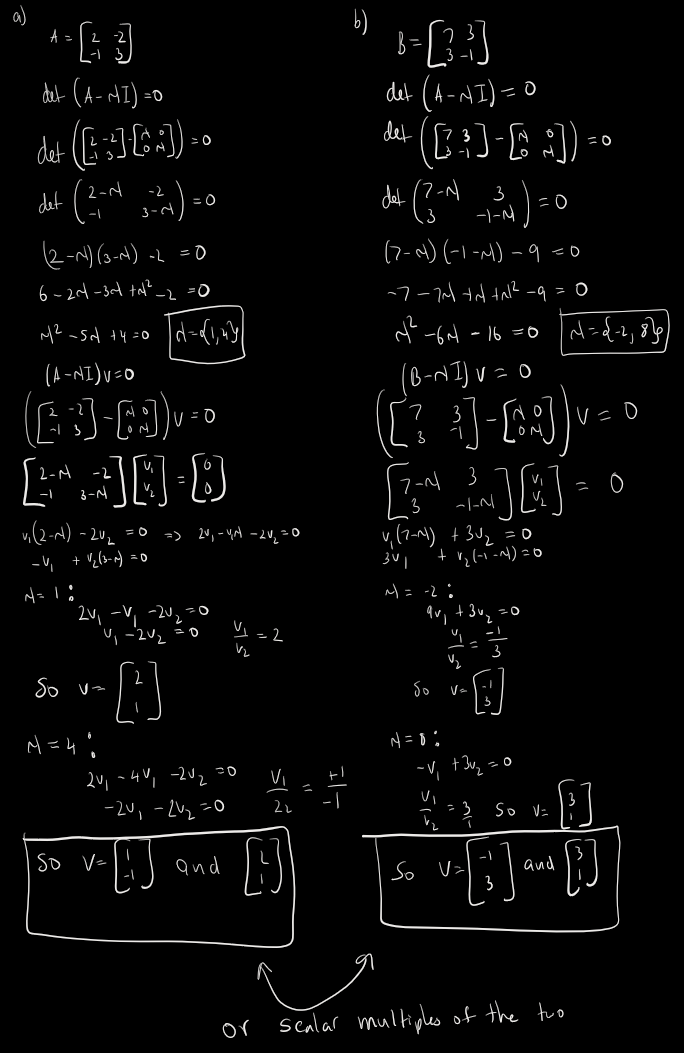

## Part 1.2: Computation using `numpy` (20 Points)

Now for each of the above matrices, using `numpy` find their eigenvalues and eigenvectors:

In [13]:
def compute_eigenvalues_eigenvectors(matrix, name):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    print(f"Eigenvalues of {name}:", eigenvalues)
    print(f"Eigenvectors of {name}:\n", eigenvectors)
    return eigenvalues, eigenvectors

A = [[2, -2], [-1, 3]]
B = [[7, 3], [3, -1]]

eigenvalues_A, eigenvectors_A = compute_eigenvalues_eigenvectors(A, 'A')
eigenvalues_B, eigenvectors_B = compute_eigenvalues_eigenvectors(B, 'B')


Eigenvalues of A: [1. 4.]
Eigenvectors of A:
 [[-0.89442719  0.70710678]
 [-0.4472136  -0.70710678]]
Eigenvalues of B: [ 8. -2.]
Eigenvectors of B:
 [[ 0.9486833  -0.31622777]
 [ 0.31622777  0.9486833 ]]


# Part 2: Projections/Line of Best Fit

## Part 2.1: 2-d Projection by hand (25 points)

Show all math work/steps (no matter how trivial) to receive full credit. You may either use LaTeX typesetting within a Markdown cell, or do it by hand with pen and paper and embed the image in this .ipynb file, or submit a separate pdf file with your handwritten work. Round all decimals to three places. 

Find the projection of vector $\vec{a}$ onto vector $\vec{b}$:

$$\vec{a} = \begin{bmatrix}
    -4 \\ 1
\end{bmatrix}$$

$$\vec{b} = \begin{bmatrix}
    1 \\ 2
\end{bmatrix}$$


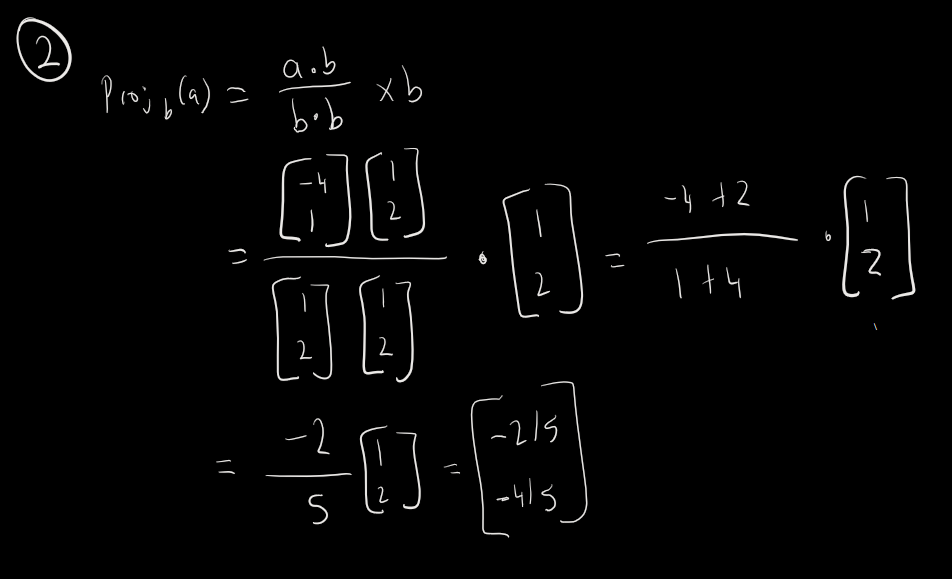

## Part 2.2: Line of Best Fit using `numpy`

Now, let's extend this to a real data example. You will find a `big_recipe.csv` in the Labs Module, which contains a recipe data set that we scraped earlier in the semester. For this last part, we will try to answer the question "How would we mathematically quantify the linear relationship between Cholesterol and Total Fat in these recipes?"

### Part 2.2.1: Exploring Data (5 points)

The data are read in for you, and a plot is made below. In a markdown cell, explain why you would or would not think that fitting a straight line to model this relationship makes sense.

In [14]:
recipe_df = pd.read_csv('big_recipe.csv')

px.scatter(data_frame=recipe_df, x='Cholesterol', y='Total Fat', color='query', hover_data=['name'])

Visually the data appears to follow a roughtly positive linear correlation, so fitting a straight line to model this relationship makes sense. There are some outliers that may affect the fit, but overall the trend is linear evident visually.

### Part 2.2.2: Preparing Data (5 points)

In order to fit the line of best fit through these points using NumPy, we need to store the data as vectors/matrices (arrays) in NumPy. The code below does that. Explain in a markdown cell why we are storing Cholesterol in a matrix called $X$ with an additional column of 1s.

In [15]:
y = recipe_df['Total Fat'].to_numpy() # creates the vector y
X = np.vstack([recipe_df.Cholesterol.to_numpy(), np.ones(len(recipe_df.Cholesterol))]).T # creates the matrix X
X[:6,:] # prints the first six rows of the matrix X

array([[142.,   1.],
       [218.,   1.],
       [ 99.,   1.],
       [ 44.,   1.],
       [100.,   1.],
       [112.,   1.]])

We are storing Cholesterol in a matrix called X with an additional column of 1s to account for the y-intercept in the linear regression model. The additional column of 1s allows us to include the intercept term in our calculations, enabling us to fit a line that does not necessarily pass through the origin. This is important because it provides more flexibility in modeling the relationship between Cholesterol and Total Fat, allowing for a better fit to the data.

### Part 2.2.3: Fitting the Line of best fit (15 points)

Use NumPy and linear algebra to find the slope and intercept of the line of best fit. Print out the final vector. Then, in a markdown cell, address **in detail** the following:

1. What is the interpretation of the slope and intercept in the context of this problem?
2. Explain in a few sentences why this operation is the same thing as "projecting $y$ onto the span of $X$".

In [16]:
# Step 1: Compute X^T @ X
XTX = X.T @ X

# Step 2: Compute the inverse of X^T @ X
XTX_inv = np.linalg.inv(XTX)

# Step 3: Compute X^T @ y
XTy = X.T @ y

# Step 4: Compute the final result
w = XTX_inv @ XTy
print("Slope and y-intercept of the best fit line:")
print(f"Slope: {w[0]:.3f}")
print(f"Y-intercept: {w[1]:.3f}")

Slope and y-intercept of the best fit line:
Slope: 0.184
Y-intercept: 9.219


# Explain in a few sentences why this operation is the same thing as "projecting $y$ onto the span of $X$".
The operation of finding the line of best fit using the formula $\beta = (X^TX)^{-1}X^Ty$ is equivalent to projecting $y$ onto the span of $X$ because it minimizes the sum of squared differences between the observed values in $y$ and the values predicted by the linear model represented by $X\beta$. And minimizing these squared differences is exactly what the line of best fit is